- **Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

- **Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io
data = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


In [ ]:
df= pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 1)
#1 is defined so that data come in correct format

In [ ]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
#Check how many data is there
df.shape

(5000, 14)

In [ ]:
#check null value
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#check columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# Now drop unwanted columns
#axis-1 check data columns wise
#axis-0 check data row wise
#inplace=True directly change in data
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [ ]:
#check columns again
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# 5 NUmber summay

import plotly.express as ps
fig = ps.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [ ]:
#check data types
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
#check data skewness
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

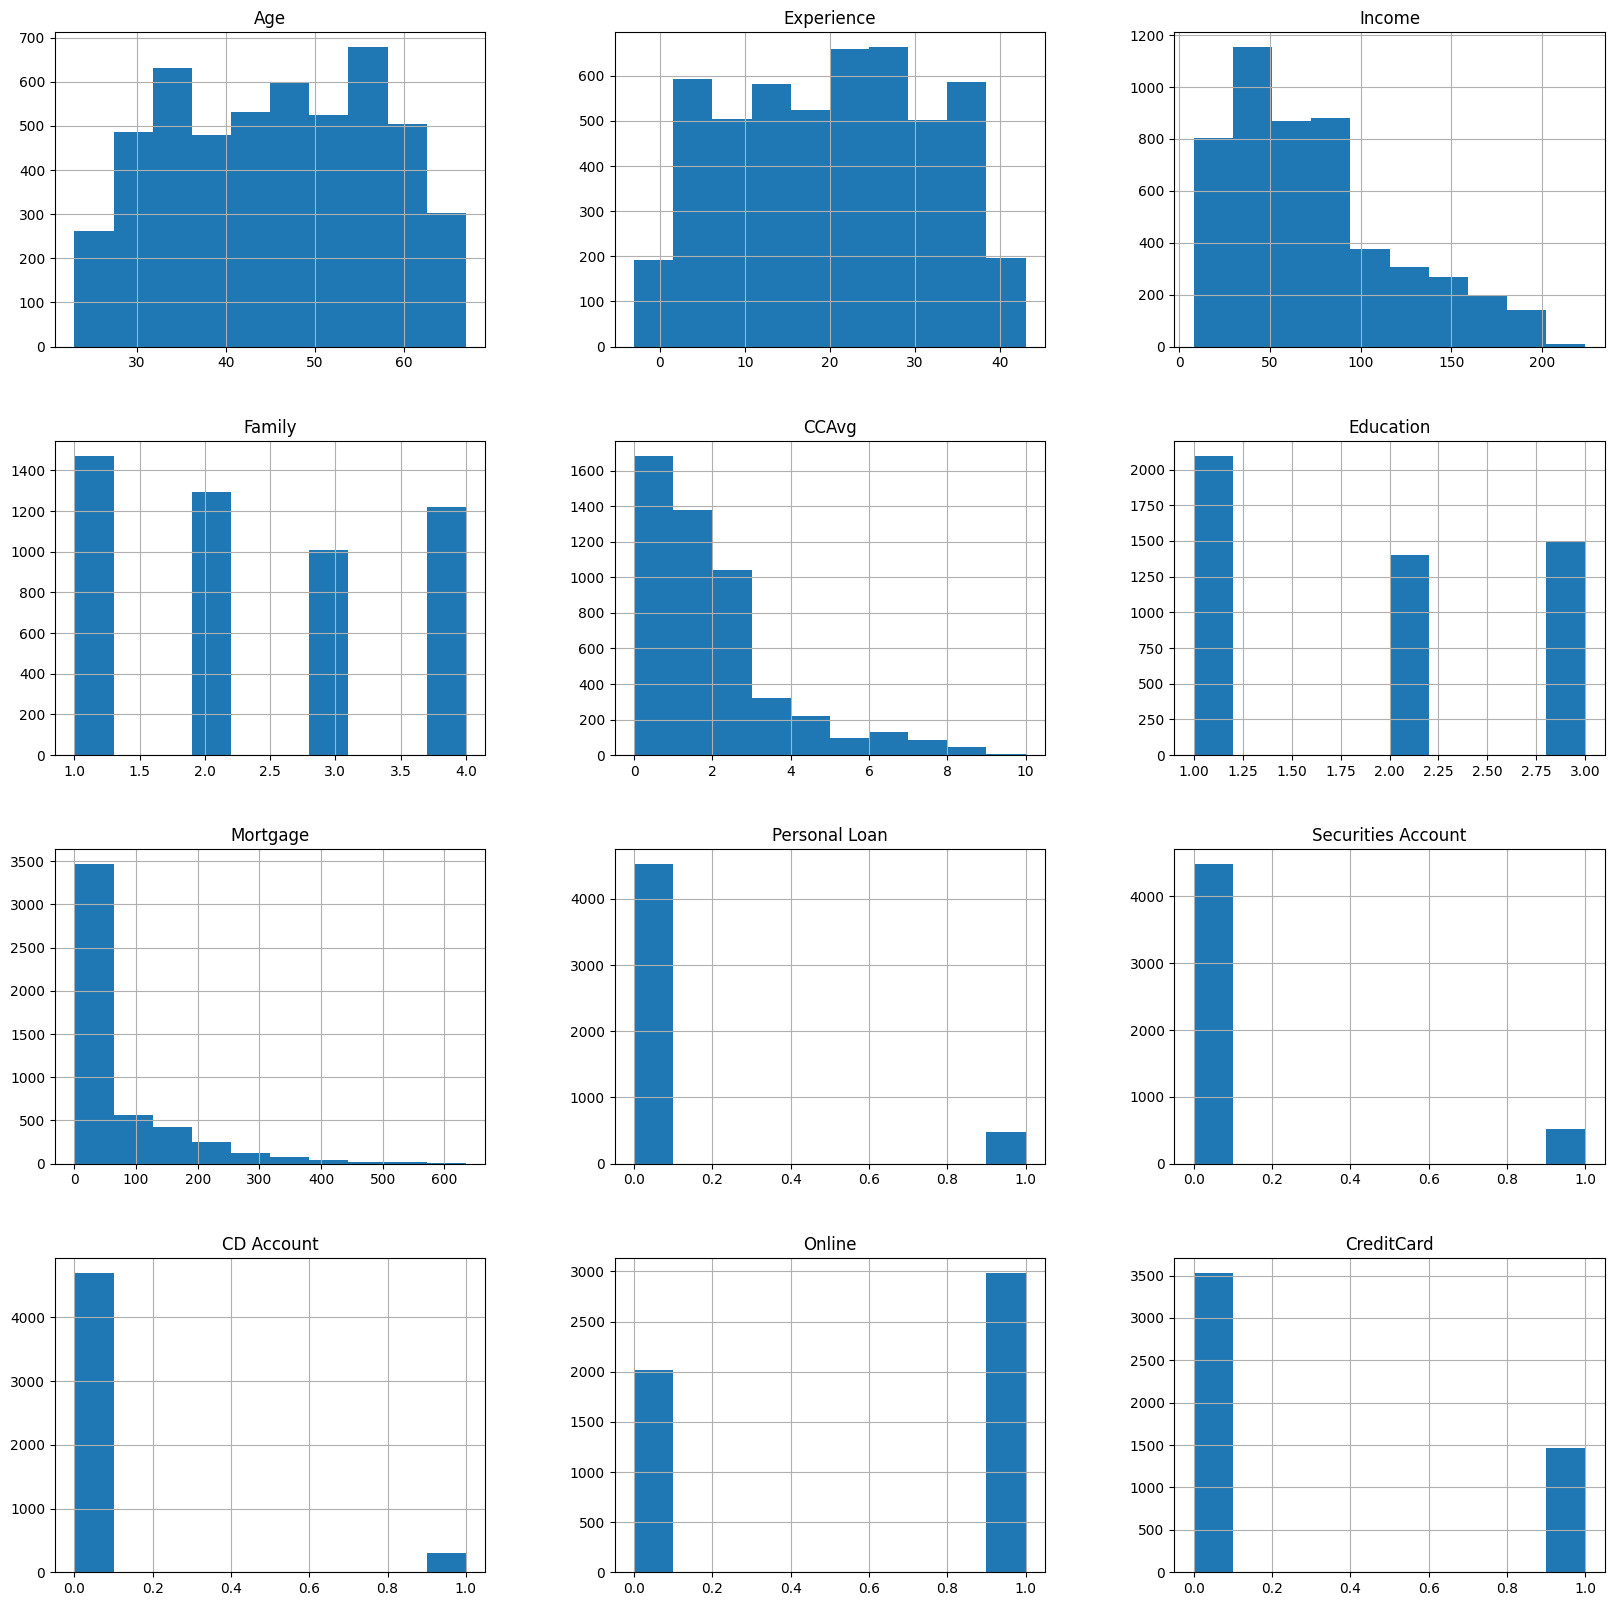

In [ ]:
# Now start plotting the graph
df.hist(figsize = (20,20))

<ipython-input-25-d584a053acb7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

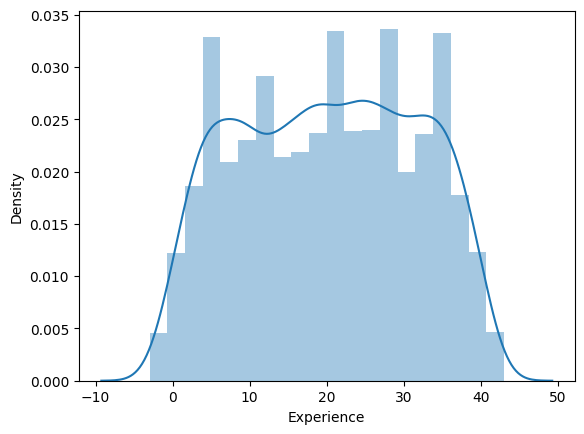

In [ ]:
#Now in the above graph we have to handle the data of education , income and so on
#Because the skewness is come so use it we have to import displot using seaborn
sns.distplot(df['Experience'])

In [ ]:
#Handle -ve data in experience using mean
df['Experience'].mean()

20.1046

In [ ]:
#Check -ve data in experience
negative_exp = df[df['Experience']<0]
negative_exp.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
89    25          -1     113       4   2.30          3         0   
226   24          -1      39       2   1.70          2         0   
315   24          -2      51       3   0.30          3         0   
451   28          -2      48       2   1.75          3        89   
524   24          -1      75       4   0.20          1         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
89               0                   0           0       0           1  
226              0                   0           0       0           0  
315              0                   0           0       1           0  
451              0                   0           0       1           0  
524              0                   0           0       1           0

In [ ]:
negative_exp.shape

(52, 12)

In [ ]:
#Handle -ve data in experience age wise
sns.distplot(negative_exp['Age'])

<ipython-input-30-7f7ca4425181>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

In [ ]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [ ]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [ ]:
#Check according to the percentage
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size ,
                                ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [ ]:
#Now handle the -ve data
data = df.copy()

In [ ]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [ ]:
data.shape

(5000, 12)

In [ ]:
import numpy as np

In [ ]:
# Makes changes in experience data
data['Experience'] = np.where(data['Experience'] < 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [ ]:
#-ve data fill with mean data
data[data['Experience']<0]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [ ]:
# Now Check corelation
data.corr()

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.977008 -0.055269 -0.046418 -0.052030   
Experience          0.977008    1.000000 -0.049054 -0.045488 -0.048719   
Income             -0.055269   -0.049054  1.000000 -0.157501  0.645993   
Family             -0.046418   -0.045488 -0.157501  1.000000 -0.109285   
CCAvg              -0.052030   -0.048719  0.645993 -0.109285  1.000000   
Education           0.041334    0.018097 -0.187524  0.064929 -0.136138   
Mortgage           -0.012539   -0.013378  0.206806 -0.020445  0.109909   
Personal Loan      -0.007726   -0.014045  0.502462  0.061367  0.366891   
Securities Account -0.000436   -0.000462 -0.002616  0.019994  0.015087   
CD Account          0.008043    0.005502  0.169738  0.014110  0.136537   
Online              0.013702    0.013455  0.014206  0.010354 -0.003620   
CreditCard          0.007681    0.008833 -0.002385  0.011588 -0.006686   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.018097 -0.013378      -0.014045           -0.000462   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136138  0.109909       0.366891            0.015087   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.005502  0.013455    0.008833  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136537 -0.003620   -0.006686  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

<Axes: >

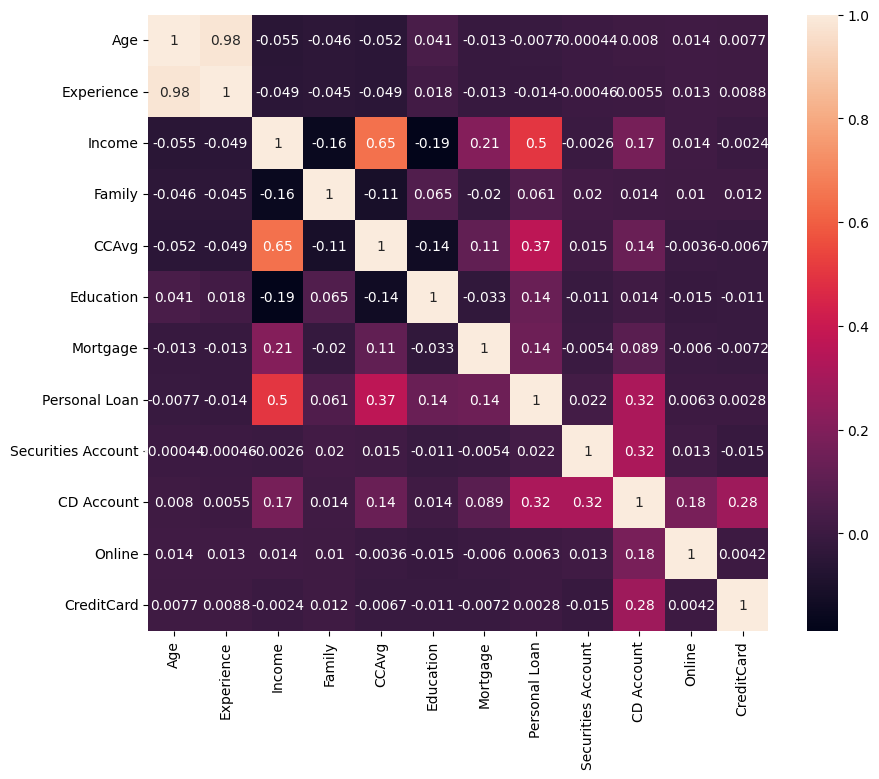

In [ ]:
#Check corelation using graph
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [ ]:
#Drop either age or experience using
data = data.drop(['Experience'], axis = 1)

In [ ]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [ ]:
# Education unique value
data['Education'].unique()

array([1, 2, 3])

In Above
1 is UnderGrad,
2 is Graduation,
3 is Working Prof.


In [ ]:
#Convert into readable data using function
def experience(x):
    if x == 1:
        return "Undergrade"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Prefessional Person"

In [ ]:
#Make new coloumn to save function data
data['EDU'] = data['Education'].apply(experience)

In [ ]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard         EDU  
0                   1           0       0           0  Undergrade  
1                   1           0       0           0  Undergrade  
2                   0           0       0           0  Undergrade  
3                   0           0       0           0    Graduate  
4                   0           0       0           1    Graduate

In [ ]:
data['EDU'].unique()

array(['Undergrade', 'Graduate', 'Prefessional Person'], dtype=object)

In [ ]:
#Plot the graph to check the education wise
education_dis = data.groupby('EDU')['Age'].count()
education_dis

EDU
Graduate               1403
Prefessional Person    1501
Undergrade             2096
Name: Age, dtype: int64

In [ ]:
import plotly.express as ps
fig = ps.pie(data, values =education_dis, names =education_dis.index, title = 'Pie Chart')
fig.show()

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [ ]:
#Check income unique data
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [ ]:
# Now handle secutiry account and CD Account
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [ ]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [ ]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [ ]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [ ]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard         EDU  \
0                   1           0       0           0  Undergrade   
1                   1           0       0           0  Undergrade   
2                   0           0       0           0  Undergrade   
3                   0           0       0           0    Graduate   
4                   0           0       0           1    Graduate   

                      Account_holder_category  
0                 Holds only Scurites account  
1                 Holds only Scurites account  
2  Does not hold Securites & Depsotie account  
3  Does not hold Securites & Depsotie account  
4  Does not hold Securites & Depsotie account

In [ ]:
#Check how many value is secutiry account and CD Account
values  = data['Account_holder_category'].value_counts()
values.index

Index(['Does not hold Securites & Depsotie account',
       'Holds only Scurites account', 'Holds only Deposite account',
       'Holds Securities & Depostie'],
      dtype='object', name='Account_holder_category')

In [ ]:
#Check how many value is secutiry account and CD Account
values  = data['Account_holder_category'].value_counts()
# Use the value counts as the dataframe for plotly express
fig = ps.pie(values, values =values.values, names =values.index, title = 'Pie Chart')
fig.show()

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [ ]:
#Compare using box-plot
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

<ipython-input-71-fed38ae9e90e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-71-fed38ae9e90e>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




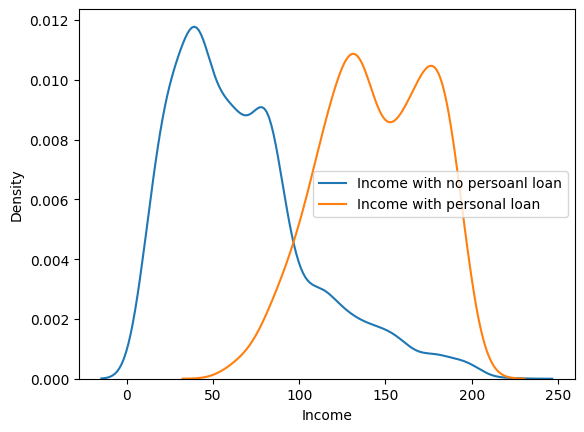

In [ ]:
#Compare data using dis-plot
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,
            label = "Income with no persoanl loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [ ]:
#Define function for checking
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,
            label =lable1)

    sns.distplot(data[data[col2] == 1][col1], hist = False,
            label = lable2)

    plt.legend()
    plt.title(title)

In [ ]:
#Using graph see comparison
plot('Income', 'Personal Loan', "Income with no persoanl loan", "Income with persoanl loan", "Income Disrbution plot")

<ipython-input-72-25898a27ac09>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-72-25898a27ac09>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<ipython-input-72-25898a27ac09>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-72-25898a27ac09>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




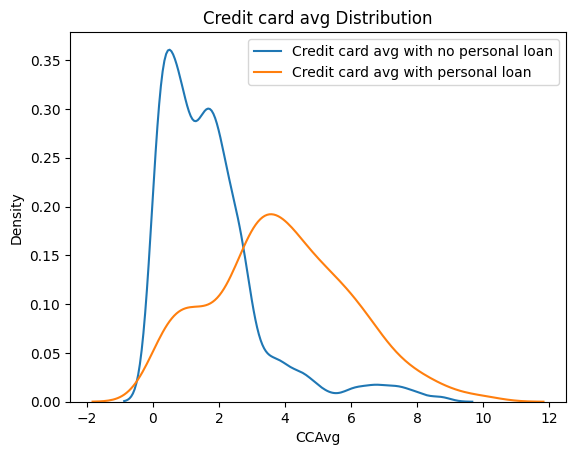

In [ ]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [ ]:
# Check analysis on the remaining coloumns
col = ['Securities Account',
      'Online',
      'Account_holder_category',
      'CreditCard']

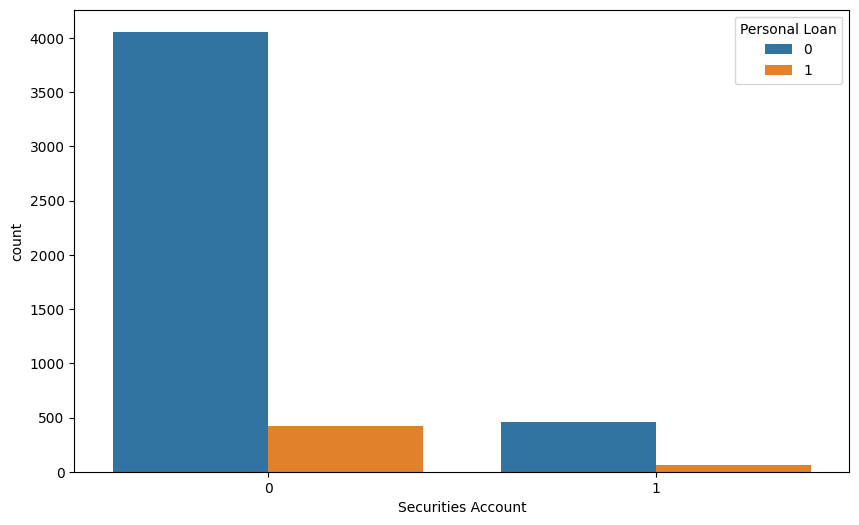

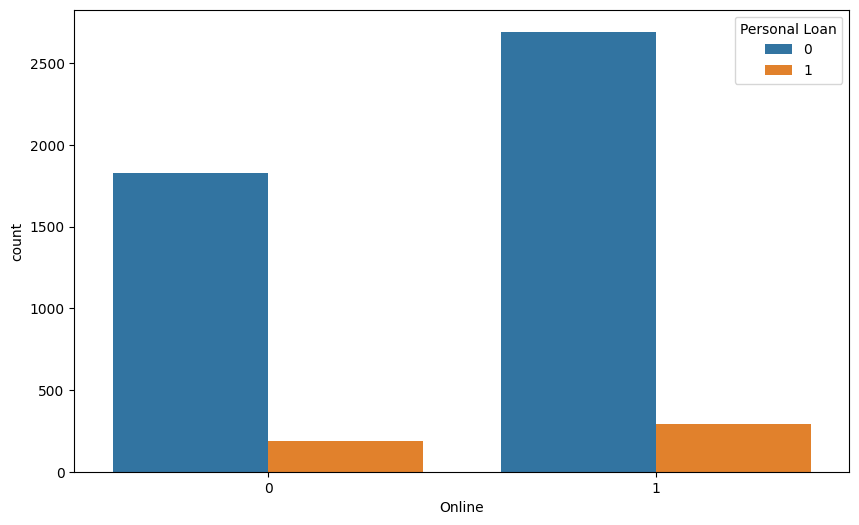

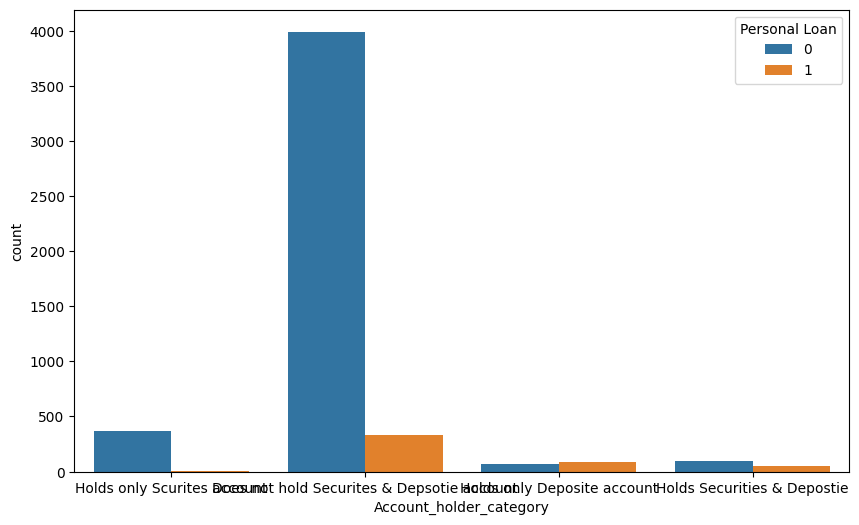

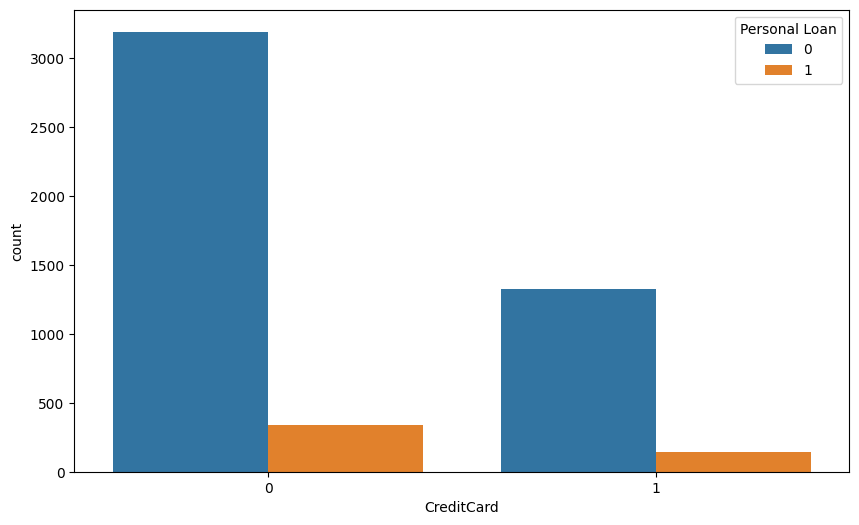

In [ ]:
# Run loop for plot the remaing col graph
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [ ]:
#Handle Skewness
from scipy.stats import zscore

In [ ]:
# Convert 'Account_holder_category' to numerical representation
# Create a mapping for categories to numerical values
account_mapping = {
    "Holds Securities & Depostie": 1,
    "Does not hold Securites & Depsotie account": 0,
    "Holds only Scurites account": 2,
    "Holds only Deposite account": 3
}

# Apply the mapping to the column
data['Account_holder_category'] = data['Account_holder_category'].map(account_mapping)

# Now, recalculate the quantiles and IQR
q1 = data.quantile(0.25, numeric_only=True)  # Include numeric_only=True
q3 = data.quantile(0.75, numeric_only=True)  # Include numeric_only=True
IQR = q3 - q1
print(IQR)

Age                         20.0
Income                      59.0
Family                       2.0
CCAvg                        1.8
Education                    2.0
Mortgage                   101.0
Personal Loan                0.0
Securities Account           0.0
CD Account                   0.0
Online                       1.0
CreditCard                   1.0
Account_holder_category      0.0
dtype: float64


In [ ]:
# Log Noranl Transform

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

Income     CCAvg
0     3.912023  0.955511
1     3.555348  0.916291
2     2.484907  0.693147
3     4.615121  1.308333
4     3.828641  0.693147
...        ...       ...
4995  3.713572  1.064711
4996  2.772589  0.336472
4997  3.218876  0.262364
4998  3.912023  0.405465
4999  4.430817  0.587787

[5000 rows x 2 columns]

<ipython-input-115-2ade498998ae>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




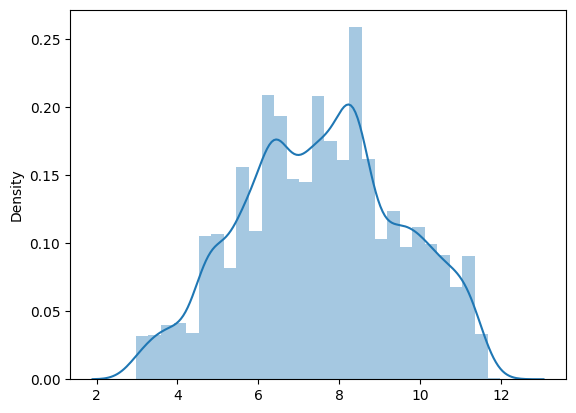

In [115]:
# Power Tranformer to handle skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
#Handle Outliers using the IQR method
def handle_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

df = handle_outliers(df)

In [ ]:
#Convert Categorical into Numerical
def encode_categorical(df):
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

df = encode_categorical(df)

In [ ]:
#Check Targeted Columns
print("Target column unique values:", df['Income'].unique())
print("Class distribution:\n", df['Income'].value_counts())

# If the target column has only one class, raise an error
if len(df['Income'].unique()) < 2:
    raise ValueError("The target column contains only one class. Cannot proceed with classification.")

Target column unique values: [ 49.   34.   11.  100.   45.   29.   72.   22.   81.  180.  105.  114.
  40.  112.  130.  186.5  21.   25.   63.   62.   43.  152.   83.  158.
  48.  119.   35.   41.   18.   50.  121.   71.  141.   80.   84.   60.
 132.  104.   52.    8.  131.   44.  139.   93.   39.  125.   32.   20.
 115.   69.   85.  135.   12.  133.   19.   82.  109.   42.   78.   51.
 113.  118.   64.  161.   94.   15.   74.   30.   38.    9.   92.   61.
  73.   70.  149.   98.  128.   31.   58.   54.  124.  163.   24.   79.
 134.   23.   13.  138.  171.  168.   65.   10.  148.  159.  169.  144.
 165.   59.   68.   91.  172.   55.  155.   53.   89.   28.   75.  170.
 120.   99.  111.   33.  129.  122.  150.  110.  101.  140.  153.  173.
 174.   90.  179.  145.  183.  182.   88.  160.  164.   14.  175.  103.
 108.  185.  154.  102.  162.  142.   95.  184.  181.  143.  123.  178.
 151. ]
Class distribution:
 Income
186.5    96
44.0     85
38.0     84
81.0     83
41.0     82
         ..

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
# Step 1: Data Preparation
target_column = "Income"
X = df.drop(columns=[target_column])
y = df[target_column]

In [119]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [120]:
# Step 2: Preprocessing Pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [121]:
# Categorical pipeline: Impute missing values and encode data
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [122]:
# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [123]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Step 4: Model Pipelines (Modified)
# Linear Regression
linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Decision Tree (Changed to DecisionTreeRegressor)
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))  # Use Regressor
])

In [169]:
# Step 5: Train and Evaluate Models
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

     # Evaluate performance
    print("Model:", pipeline.named_steps['model'].__class__.__name__)
    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("Train R2:", r2_score(y_train, y_train_pred))
    print("Test R2:", r2_score(y_test, y_test_pred))
    print("-" * 40)

In [170]:
# Evaluate both models
evaluate_model(linear_reg_pipeline, X_train, X_test, y_train, y_test)
evaluate_model(decision_tree_pipeline, X_train, X_test, y_train, y_test)

Model: LinearRegression
Train RMSE: 34.29054070066938
Test RMSE: 34.13588486287169
Train R2: 0.434174187506259
Test R2: 0.44350530583809744
----------------------------------------
Model: DecisionTreeRegressor
Train RMSE: 3.6380011109582324
Test RMSE: 31.540086926534194
Train R2: 0.9936311687190493
Test R2: 0.5249224919303099
----------------------------------------


In [171]:
# Save the trained DecisionTree Regressor pipeline
import pickle
pickle.dump(decision_tree_pipeline, open('Type1_model.pkl', 'wb'))  # Save the correct pipeline
print("Model saved as 'Type1_model.pkl'")

Model saved as 'Type1_model.pkl'


In [172]:
# Load the model and make predictions
loaded_model = pickle.load(open('Type1_model.pkl', 'rb'))

In [173]:
# Display the columns used during training
print("Training feature columns:", X.columns)

Training feature columns: Index(['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Income_Category'],
      dtype='object')


In [174]:
# Define a sample input with the exact columns
sample_input = pd.DataFrame(
    [[35, 10, 2, 2.5, 3, 50000, 0, 1, 0, 1, 0, 3]],
    columns=['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage',
             'Personal Loan', 'Securities Account', 'CD Account', 'Online',
             'CreditCard', 'Income_Category']
)

In [175]:
# Predict using the loaded model
prediction = loaded_model.predict(sample_input)
print(f"Prediction for sample input: {prediction}")

Prediction for sample input: [91.]
